In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\AFNAN KHAN\Downloads\zomato.csv.zip")

In [3]:
drop_columns= ["url", "address", "phone", "location", "reviews_list", "menu_item", "listed_in(city)", "rest_type", "dish_liked", "cuisines"]

In [4]:
df = df.drop(columns=drop_columns)

In [5]:
df["rate"] = df["rate"].replace("NEW", np.nan)

In [6]:
df = df.dropna(subset=["rate"])

In [7]:
def HandleRate(value):
    if value in ["NEW", None, "-", ""]:  # "NEW", NaN, "-", aur empty string ko check kare
        return None  # Inhe ignore karna ya None return karna
    try:
        value = str(value).split('/')
        return float(value[0])  # Attempt to convert to float
    except ValueError:
        return None  # Agar conversion mein error aaye to None return kare

df["rate"] = df["rate"].apply(HandleRate)


In [17]:
df.head(2)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet


# Which type of restaurant receives the most food orders?

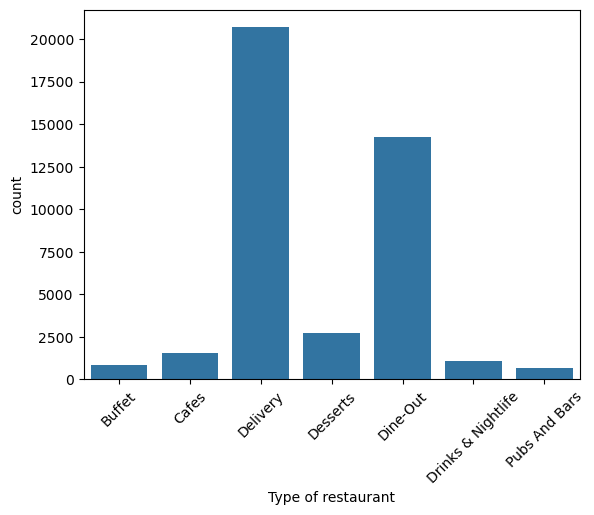

In [45]:
sns.countplot(x="listed_in(type)", data=df)
plt.xlabel("Type of restaurant")
plt.xticks(rotation=45)
plt.show()

# How may votes has each type of rasturant received from customers

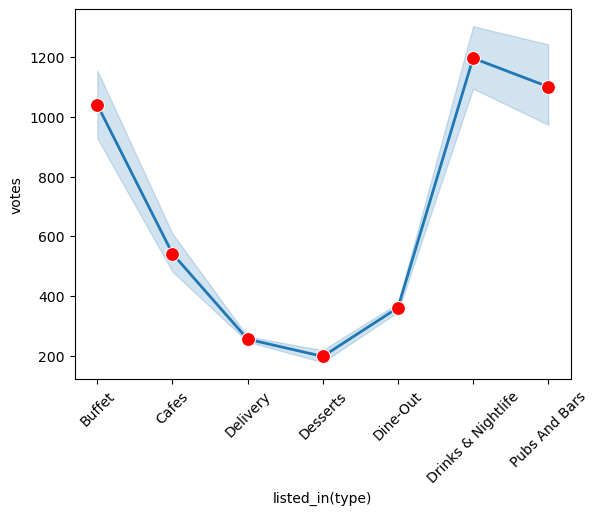

In [46]:
sns.lineplot(x="listed_in(type)", y="votes", data=df, marker='o', markersize=10, markerfacecolor='red',  linewidth=2)
plt.xticks(rotation=45)
plt.show()

# What are the ratings that the majority of restaurant have received?

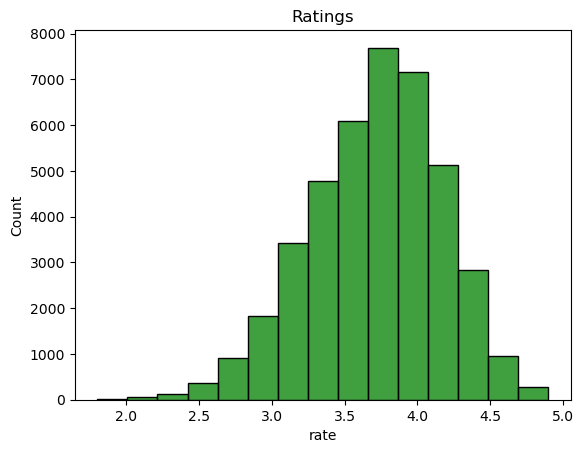

In [57]:
sns.histplot(x="rate", bins=15, color='green', data=df)
plt.title("Ratings")
plt.show()

# Zamoto has observer that most cuple order most of thire their food online.what is their average spending on each order?

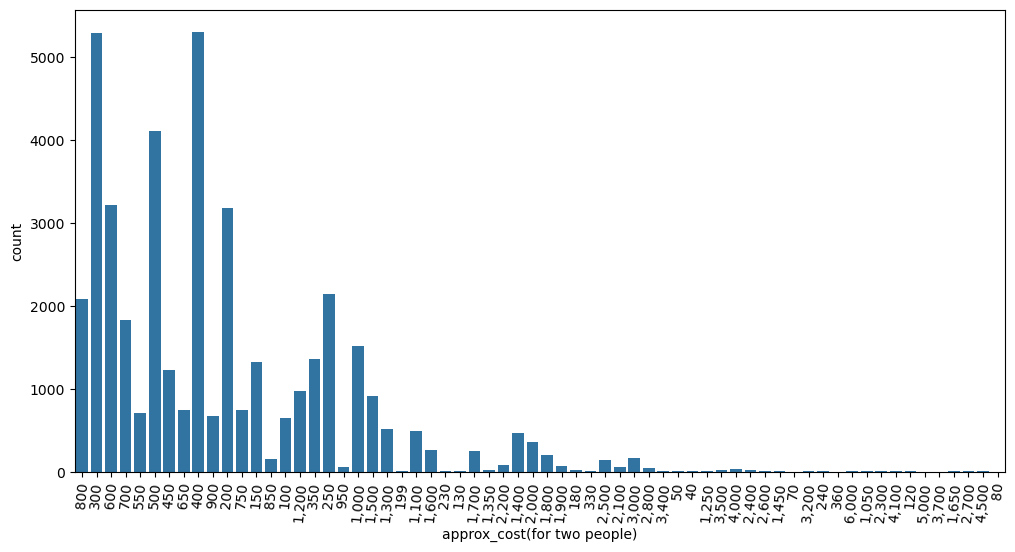

In [75]:
plt.figure(figsize=(12, 6))

sns.countplot(x="approx_cost(for two people)", data=df)
plt.xticks(rotation=85)
plt.show()

# Which mode (online or ofline) has received the maximum ratings

<Axes: xlabel='online_order', ylabel='rate'>

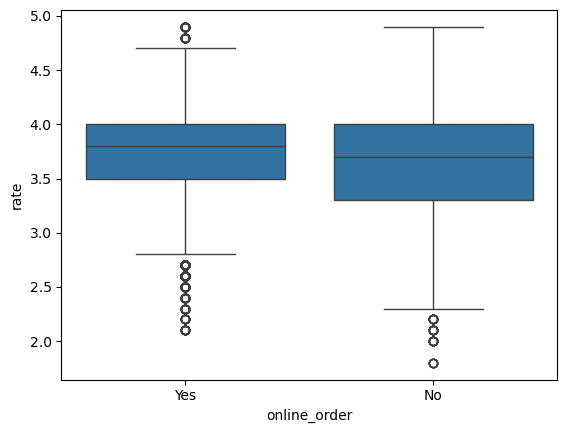

In [79]:
sns.boxplot(x="online_order", y="rate", data=df)

# Which type of restaurant received more offline orders, so that Zomato can promote customers with some good offers

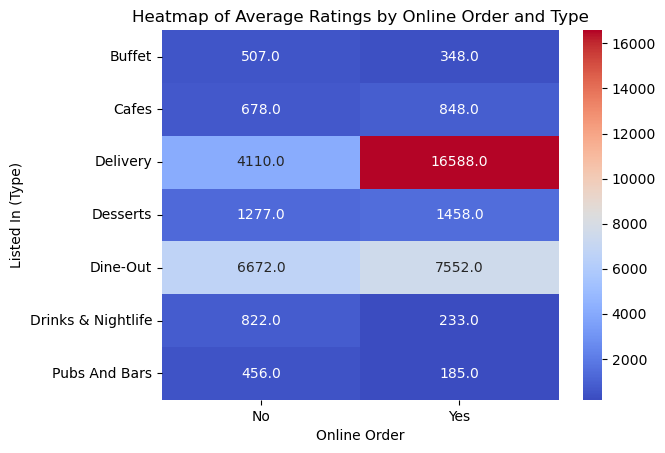

In [91]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order',  aggfunc='size', fill_value=0)

sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.1f')  
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.title("Heatmap of Average Ratings by Online Order and Type")
plt.show()